In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ind=pd.read_csv("covid_19_india.csv",parse_dates=True)
ind_test=pd.read_csv("StatewiseTestingDetails.csv",
                     parse_dates=True)
ind_vac=pd.read_csv("covid_vaccine_statewise.csv",
                    parse_dates=True)

In [3]:
ind.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
ind['Date']=pd.to_datetime(ind['Date'])
ind.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [5]:
ind_test['Date']=pd.to_datetime(ind_test['Date'])
ind_test.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative                object
Positive               float64
dtype: object

In [6]:
ind_vac['Updated On']=pd.to_datetime(ind_vac['Updated On'],
                                     format='%d/%m/%Y')
ind_vac.dtypes

Updated On                             datetime64[ns]
State                                          object
Total Doses Administered                      float64
Sessions                                      float64
 Sites                                        float64
First Dose Administered                       float64
Second Dose Administered                      float64
Male (Doses Administered)                     float64
Female (Doses Administered)                   float64
Transgender (Doses Administered)              float64
 Covaxin (Doses Administered)                 float64
CoviShield (Doses Administered)               float64
Sputnik V (Doses Administered)                float64
AEFI                                          float64
18-44 Years (Doses Administered)              float64
45-60 Years (Doses Administered)              float64
60+ Years (Doses Administered)                float64
18-44 Years(Individuals Vaccinated)           float64
45-60 Years(Individuals Vacc

In [7]:
d1=ind.groupby('Date').sum()
d2=ind_test.groupby('Date').sum()

C:\Users\SRAVA\AppData\Local\Temp\ipykernel_12412\396605340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d1=ind.groupby('Date').sum()
C:\Users\SRAVA\AppData\Local\Temp\ipykernel_12412\396605340.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d2=ind_test.groupby('Date').sum()


In [8]:
d2.head(3)

,TotalSamples,Positive
Date,,
2020-04-01,11245.0,302.0
2020-04-02,14906.0,510.0
2020-04-03,20130.0,898.0


In [9]:
d1['Active']=d1['Confirmed']-d1['Deaths']-d1['Cured']

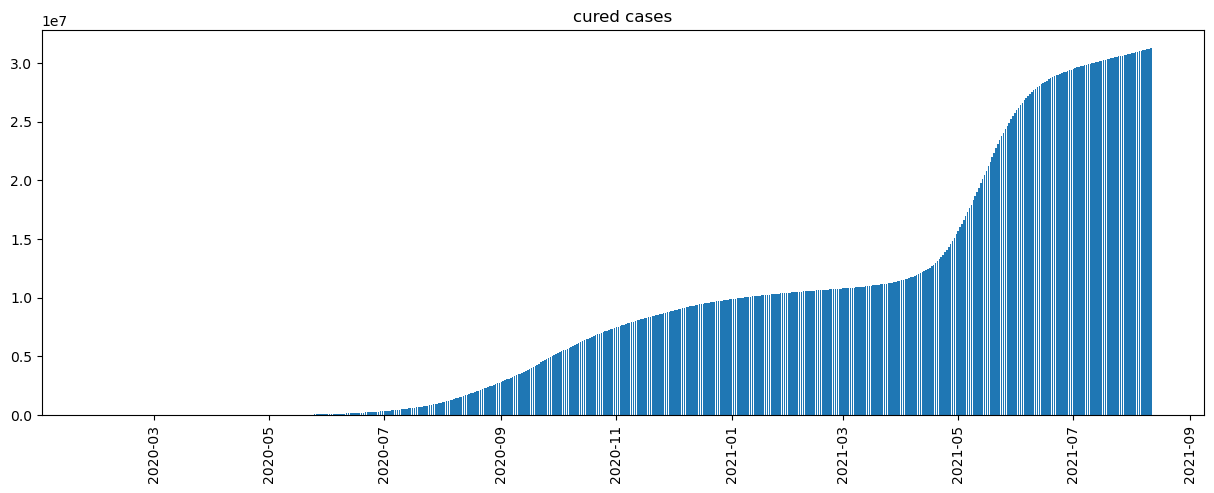

In [10]:
plt.figure(figsize=(15,5))
plt.bar(d1.index,d1['Cured'])
plt.title("cured cases")
plt.xticks(rotation=90)
plt.show()

In [11]:
print("Avg increase in Confirmed cases :",
      np.round(d1["Confirmed"].diff().fillna(0).mean()))
print("Avg increase in Cured cases :",
      np.round(d1["Cured"].diff().fillna(0).mean()))
print("Avg increase in Death cases :",
      np.round(d1["Deaths"].diff().fillna(0).mean()))

Avg increase in Confirmed cases : 57208.0
Avg increase in Cured cases : 55752.0
Avg increase in Death cases : 766.0


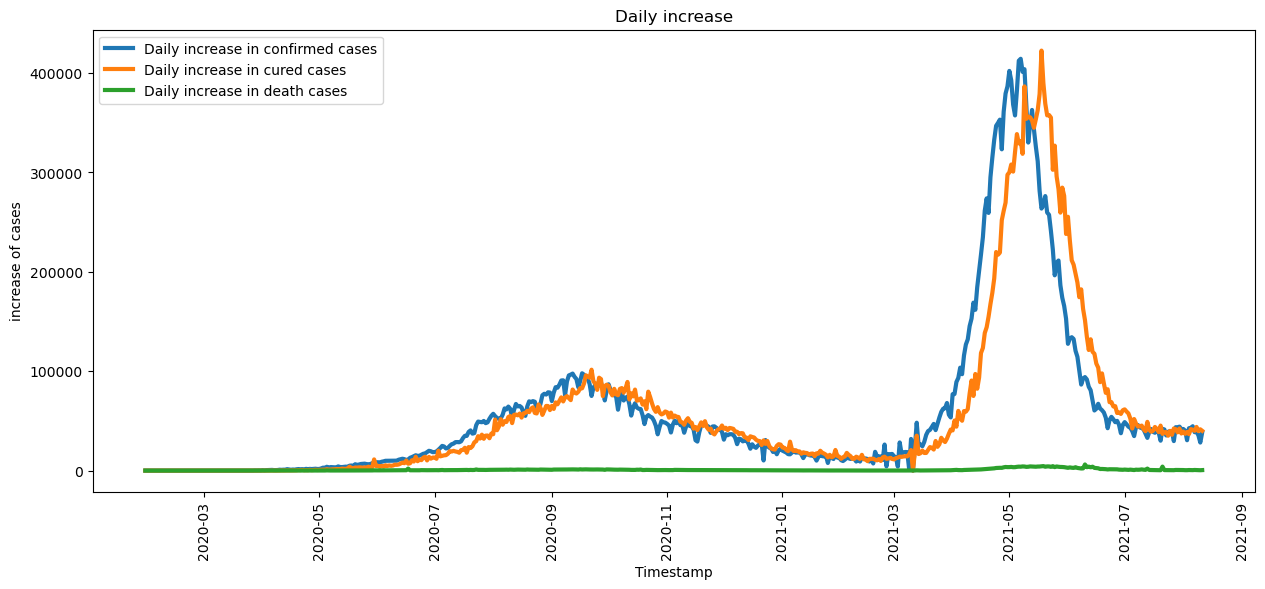

In [12]:
plt.figure(figsize=(15,6))
plt.plot(d1["Confirmed"].diff().fillna(0),
         label="Daily increase in confirmed cases",linewidth=3)
plt.plot(d1["Cured"].diff().fillna(0),
         label="Daily increase in cured cases",linewidth=3)
plt.plot(d1["Deaths"].diff().fillna(0),
         label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("increase of cases")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [13]:
d1.drop(labels="Sno",axis=1,inplace=True)

In [14]:
d1

,Cured,Deaths,Confirmed,Active
Date,,,,
2020-01-30,0,0,1,1
2020-01-31,0,0,1,1
2020-02-01,0,0,2,2
2020-02-02,0,0,3,3
2020-02-03,0,0,3,3
...,...,...,...,...
2021-08-07,31055861,427371,31895385,412153
2021-08-08,31099771,427862,31934455,406822
2021-08-09,31139457,428309,31969954,402188


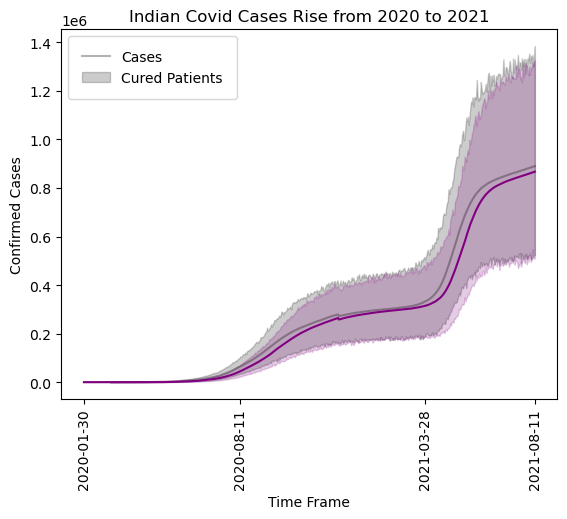

In [15]:
sns.lineplot(x='Date',y='Confirmed',data=ind,
             color='black',alpha=0.3)
sns.lineplot(x='Date',y='Cured',data=ind,
             color='purple')
plt.xlabel('Time Frame')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90,ticks=['2020-01-30','2020-08-11',
                              '2021-03-28','2021-08-11'])
plt.title('Indian Covid Cases Rise from 2020 to 2021')
plt.legend(labels=['Cases', 'Cured Patients'],loc=2,
           borderpad=1,fontsize=10)

In [16]:
ind['Year']=pd.DatetimeIndex(ind['Date']).year
ind['Month']=pd.DatetimeIndex(ind['Date']).month
ind['Day']=pd.DatetimeIndex(ind['Date']).day

In [17]:
ind.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1,31
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,2,1
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,2,3


Text(0.5, 1.0, 'Monthly Case Rise from 2020')

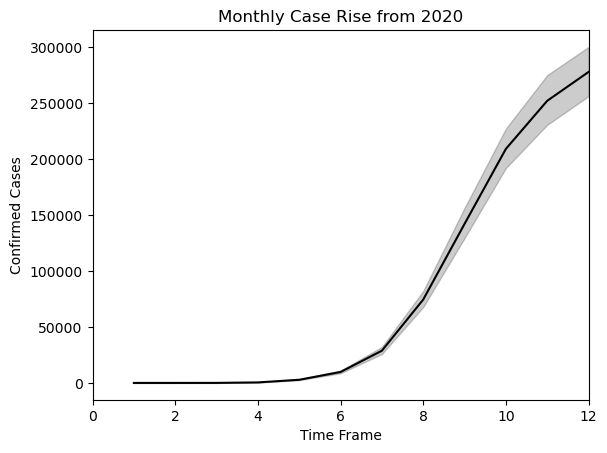

In [18]:
ind_2020=ind.where(ind['Date'].dt.year==2020)
sns.lineplot(x='Month',y='Confirmed',data=ind_2020,color='black')
plt.xlabel('Time Frame')
plt.ylabel('Confirmed Cases')
plt.xlim(0,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Monthly Case Rise from 2020')

Text(0.5, 1.0, 'Monthly Case Rise from 2021')

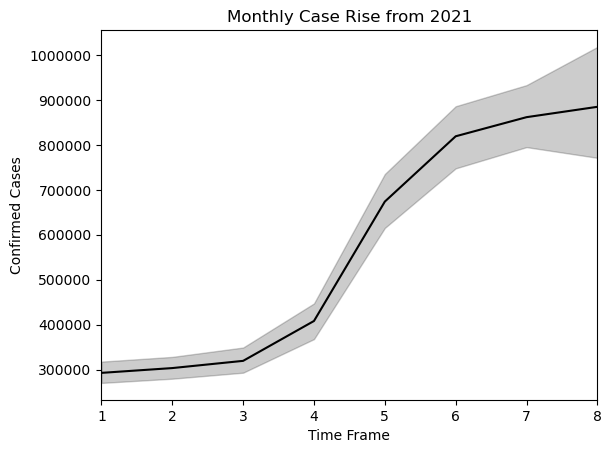

In [19]:
ind_2021=ind.where(ind['Date'].dt.year==2021)
sns.lineplot(x='Month',y='Confirmed',data=ind_2021,color='black')
plt.xlabel('Time Frame')
plt.ylabel('Confirmed Cases')
plt.xlim(1,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Case Rise from 2021')

In [20]:
state_wise = ind.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum().reset_index()
px.bar(x=state_wise.nlargest(10,"Confirmed")["State/UnionTerritory"],
       y = state_wise.nlargest(10,"Confirmed")["Confirmed"],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title='Lowest Herd Immunity states as per cases')

In [ ]:
ind_vac.head()

In [ ]:
ind_vac.fillna(0,inplace=True)

In [ ]:
ind_vac.rename(columns={'Updated On':'Date'},inplace=True)

In [ ]:
merge=pd.merge(left=ind_vac,right=d1,how='inner',on='Date')

In [25]:
merge

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated,Cured,Deaths,Confirmed,Active
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23757.0,24517.0,2.0,48276.0,10179715,152093,10542841,211033
1,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,10179715,152093,10542841,211033
2,2021-01-16,Andhra Pradesh,4216.0,541.0,339.0,4216.0,0.0,857.0,3359.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4216.0,10179715,152093,10542841,211033
3,2021-01-16,Arunachal Pradesh,81.0,10.0,9.0,81.0,0.0,40.0,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,81.0,10179715,152093,10542841,211033
4,2021-01-16,Assam,401.0,79.0,64.0,401.0,0.0,141.0,260.0,0.0,...,0.0,0.0,0.0,0.0,0.0,401.0,10179715,152093,10542841,211033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7691,2021-08-11,Telangana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31220981,429179,32036511,386351
7692,2021-08-11,Tripura,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31220981,429179,32036511,386351
7693,2021-08-11,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31220981,429179,32036511,386351
7694,2021-08-11,Uttarakhand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31220981,429179,32036511,386351


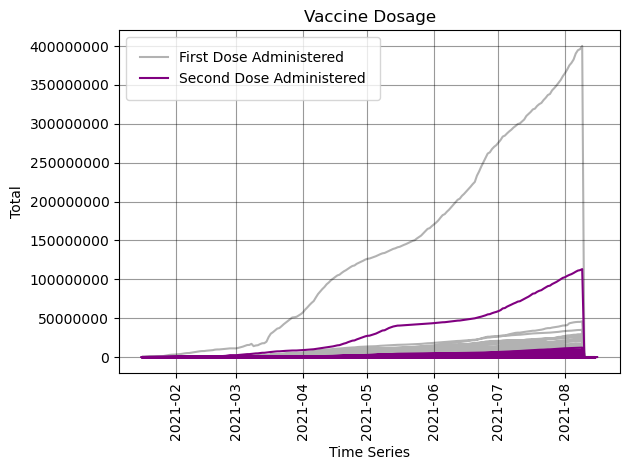

In [26]:
plt.plot(ind_vac['Date'],ind_vac['First Dose Administered']
         ,color='black',alpha=0.3)
plt.plot(ind_vac['Date'],ind_vac['Second Dose Administered'],
         color='purple')
plt.xlabel('Time Series')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title('Vaccine Dosage', color='black')
plt.legend(labels=['First Dose Administered', 'Second Dose Administered'],
           loc=2,borderpad=1,fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
merge['Date']=pd.to_datetime(merge['Date'])
d3 = merge.groupby('Date').sum(numeric_only=True)
d1

,Cured,Deaths,Confirmed,Active
Date,,,,
2020-01-30,0,0,1,1
2020-01-31,0,0,1,1
2020-02-01,0,0,2,2
2020-02-02,0,0,3,3
2020-02-03,0,0,3,3
...,...,...,...,...
2021-08-07,31055861,427371,31895385,412153
2021-08-08,31099771,427862,31934455,406822
2021-08-09,31139457,428309,31969954,402188


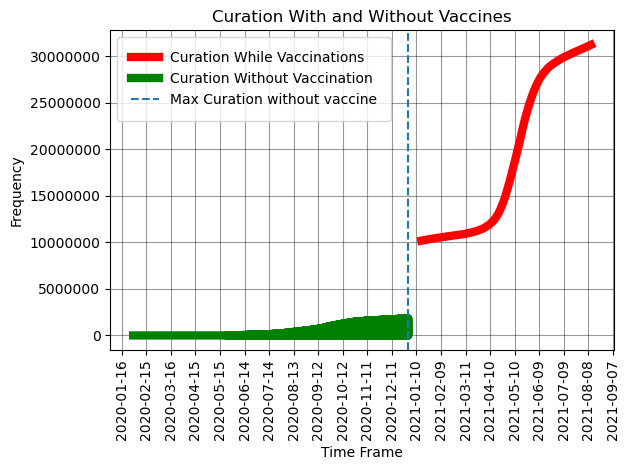

In [28]:
import matplotlib.dates as mdates
merge['Date'] = pd.to_datetime(merge['Date'])
ind['Date'] = pd.to_datetime(ind['Date'])
max_date = pd.to_datetime('2020-12-31')

plt.plot(merge['Date'], merge['Cured'], label='Curation While Vaccinations',
         linewidth=6, color='r')
indf = ind[ind['Date'] <= max_date]
plt.plot(indf['Date'], indf['Cured'], label='Curation Without Vaccination',
         linewidth=6, color='g')
plt.axvline(max_date, label='Max Curation without vaccine', linestyle='--')
plt.xlabel('Time Frame', color='black')
plt.ylabel('Frequency', color='black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  
plt.xticks(rotation=90) 
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color='black', alpha=0.4)
plt.title('Curation With and Without Vaccines', color='black')
plt.legend(loc=2, borderpad=1, fontsize=10)
plt.tight_layout()
plt.show()

#As per above vaccination analysis, the curing rate of virus is more during vaccination period compared to previous period. So immune level was increased through vaccination

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import shap
from tqdm import tqdm

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [30]:
merge['Vaccination_Percentage'] = (ind_vac['Total Individuals Vaccinated'] / 1430000000) * 100

In [31]:
X = merge['Vaccination_Percentage'].values.reshape(-1, 1)
y = merge['Confirmed'].values

In [32]:
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


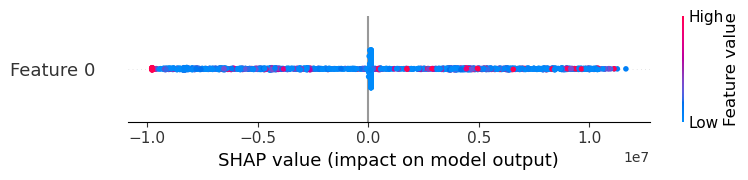

In [36]:
shap.summary_plot(shap_values, X_test)

In [37]:
beta = 0.3  
gamma = 0.1  
S0 = 0.99  
I0 = 0.01 
R0 = 0.0  

In [38]:
from scipy.integrate import solve_ivp
t_span = (0, len(X_test))
solution = solve_ivp(sir_model, t_span, [S0, I0, R0], args=(beta, gamma), dense_output=True)

In [39]:
threshold = 0.05 
herd_immunity_threshold = 0.0
for t in range(1, len(X_test)):
    S, I, R = solution.sol(t)
    Ro=beta / gamma
    if I < threshold:
        herd_immunity_threshold = (1.0 - (1.0 / Ro))
        break

In [40]:
print(f'Herd Immunity Threshold: {herd_immunity_threshold:.2f}%')

Herd Immunity Threshold: 0.67%


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
accc=model.score(X,y)
mse = mean_squared_error(y_test, y_pred)

In [42]:
accc

0.43248300942831286

In [43]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


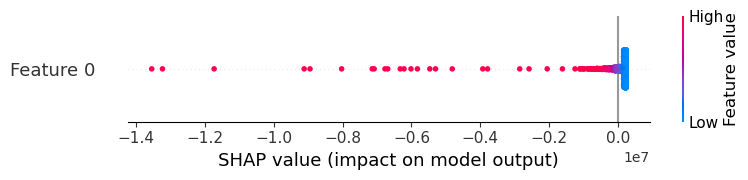

In [44]:
explainer_2 = shap.Explainer(model_2, X_train)
shap_values_2 = explainer_2(X_test)
shap.summary_plot(shap_values_2, X_test)

In [45]:
y_pred2 = model_2.predict(X_test)
acur=model_2.score(X,y)
mse2 = mean_squared_error(y_test, y_pred2)

In [46]:
acur

0.011661345486362884

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
model_3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


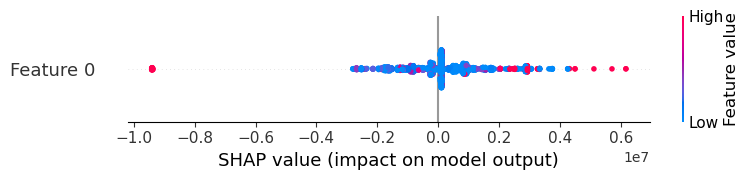

In [48]:
explainer_3 = shap.Explainer(model_3)
shap_values_3 = explainer_3.shap_values(X_test)
shap.summary_plot(shap_values_3, X_test)

In [49]:
from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor(random_state=42)
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


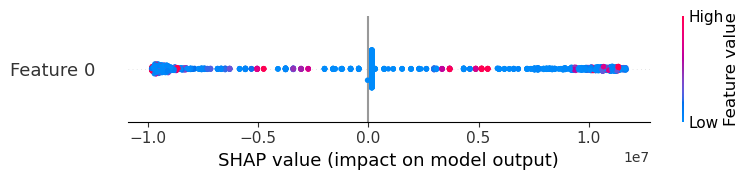

In [50]:
explainer4 = shap.Explainer(model4)
shap_values4 = explainer4.shap_values(X_test)
shap.summary_plot(shap_values4, X_test)

In [51]:
y_pred4 = model4.predict(X_test)
acur4=model4.score(X,y)
mse4 = mean_squared_error(y_test, y_pred4)

In [52]:
acur4

0.47690488027520883